<a href="https://colab.research.google.com/github/gowthamav007/sample-customer-analysis/blob/main/Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CUSTOMER ANALYSIS

Problem Statement:

The goal of this project is to analyze customer behavior and classify them based on their likelihood to accept campaigns held by a company. Additionally, we aim to segment customers into different groups to gain insights into their behavior patterns.

Introduction : The dataset contains information about customers, including various attributes such as age, gender, income, past purchase history, and campaign acceptance. We'll explore correlations among these features and derive insights to understand customer behavior better.

Exploratory Data Analysis (EDA). We'll load the dataset, inspect its structure, and perform initial analysis to understand the data better.

I'll begin by importing the required libraries and loading the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [278]:
df = pd.read_csv("/content/customer_train.csv")

We will start by checking the information of the data.

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         1680 non-null   int64  
 1   Unnamed: 0           1680 non-null   int64  
 2   ID                   1680 non-null   int64  
 3   Year_Birth           1680 non-null   int64  
 4   Education            1680 non-null   object 
 5   Marital_Status       1680 non-null   object 
 6   Income               1663 non-null   float64
 7   Kidhome              1680 non-null   int64  
 8   Teenhome             1680 non-null   int64  
 9   Dt_Customer          1680 non-null   object 
 10  Recency              1680 non-null   int64  
 11  MntCoke              1680 non-null   int64  
 12  MntFruits            1680 non-null   int64  
 13  MntMeatProducts      1680 non-null   int64  
 14  MntFishProducts      1680 non-null   int64  
 15  MntSweetProducts     1680 non-null   i

In [280]:
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


In [281]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1680.000000,1680.000000,1680.000000,1680.000000,1.663000e+03,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.0,1680.0,1680.000000
mean,839.500000,839.500000,5551.728571,1968.847619,5.201434e+07,0.452381,0.500000,49.083333,3.048994e+05,25918.452381,...,5.332143,0.071429,0.074405,0.069048,0.062500,0.011905,0.010119,3.0,11.0,0.144048
std,485.118542,485.118542,3238.155703,12.027192,2.148248e+07,0.546901,0.550055,28.930637,3.387051e+05,39532.059109,...,2.449814,0.257616,0.262507,0.253611,0.242134,0.108490,0.100113,0.0,0.0,0.351243
min,0.000000,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,419.750000,419.750000,2823.250000,1960.000000,3.568800e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,839.500000,839.500000,5381.000000,1970.000000,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1259.250000,1259.250000,8370.750000,1977.000000,6.812200e+07,1.000000,1.000000,74.000000,4.942500e+05,32000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1679.000000,1679.000000,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.dtypes

,0
Unnamed: 0.1,int64
Unnamed: 0,int64
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object


Data Preprocessing: Remove unnecessary columns (e.g., 'Unnamed: 0.1', 'Unnamed: 0','ID', 'Z_CostContact', 'Z_Revenue'), handle missing values in the 'Income' column, and convert categorical variables into a format suitable for modeling. Feature Engineering: Explore creating new features that could be relevant for predicting campaign acceptance and customer segmentation.

In [282]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)

In [283]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,...,10,4,7,0,0,0,0,0,0,1
1,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,...,1,2,5,0,0,0,0,0,0,0
2,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,...,2,10,4,0,0,0,0,0,0,0
3,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,...,0,4,6,0,0,0,0,0,0,0
4,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,...,3,6,5,0,0,0,0,0,0,0


In [285]:
# Summary statistics for numerical columns
numerical_summary = df.describe()

# Summary of categorical columns
categorical_summary = df.describe(include=['O'])

# Check for missing values
missing_values = df.isnull().sum()
print("Numerical Summary:")
print(numerical_summary)
print("\nCategorical Summary:")
print(categorical_summary)
print("\nMissing Values:")
print(missing_values)



Numerical Summary:
        Year_Birth        Income      Kidhome     Teenhome      Recency  \
count  1680.000000  1.663000e+03  1680.000000  1680.000000  1680.000000   
mean   1968.847619  5.201434e+07     0.452381     0.500000    49.083333   
std      12.027192  2.148248e+07     0.546901     0.550055    28.930637   
min    1893.000000  1.730000e+06     0.000000     0.000000     0.000000   
25%    1960.000000  3.568800e+07     0.000000     0.000000    24.000000   
50%    1970.000000  5.125000e+07     0.000000     0.000000    50.000000   
75%    1977.000000  6.812200e+07     1.000000     1.000000    74.000000   
max    1996.000000  1.623970e+08     2.000000     2.000000    99.000000   

            MntCoke      MntFruits  MntMeatProducts  MntFishProducts  \
count  1.680000e+03    1680.000000     1.680000e+03      1680.000000   
mean   3.048994e+05   25918.452381     1.657738e+05     36954.761905   
std    3.387051e+05   39532.059109     2.242424e+05     54165.456719   
min    0.000000e+

<ipython-input-118-12c0b5a63fdc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace= True)


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntCoke,0


In [ ]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')

Creating a new features called 'Customer_years' to understand the Number of years since the customer joined.

In [ ]:
df['Customer_years']=2025-df['Dt_Customer'].dt.year
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_years
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,...,0,0,0,0,0,0,3,11,1,13
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,...,0,0,0,0,0,0,3,11,0,11
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,...,0,0,0,0,0,0,3,11,0,12
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,...,0,0,0,0,0,0,3,11,0,11
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,...,0,0,0,0,0,0,3,11,0,11


Creating a new features called 'Age' to understand Current age of the customer (based on Year_Birth).

In [ ]:
df["Age"] = 2025-df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_years,Age
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,...,0,0,0,0,0,3,11,1,13,68
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,...,0,0,0,0,0,3,11,0,11,71
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,...,0,0,0,0,0,3,11,0,12,60
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,...,0,0,0,0,0,3,11,0,11,41
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,...,0,0,0,0,0,3,11,0,11,44


Convert categorical variables like 'Education' and 'Marital Status' to nummerical variables using LabelEncoder.

In [ ]:
label_encoder = LabelEncoder()
df['Education']=label_encoder.fit_transform(df['Education'])
df['Marital_Status']= label_encoder.fit_transform(df['Marital_Status'])
df.dtypes

,0
ID,int64
Year_Birth,int64
Education,int64
Marital_Status,int64
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,datetime64[ns]
Recency,int64
MntCoke,int64


In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_years,Age
0,5524,1957,1,4,58138000.0,0,0,2012-09-04,58,635000,...,0,0,0,0,0,3,11,1,13,68
1,2174,1954,1,4,46344000.0,1,1,2014-03-08,38,11000,...,0,0,0,0,0,3,11,0,11,71
2,4141,1965,1,0,71613000.0,0,0,2013-08-21,26,426000,...,0,0,0,0,0,3,11,0,12,60
3,6182,1984,1,0,26646000.0,1,0,2014-02-10,26,11000,...,0,0,0,0,0,3,11,0,11,41
4,5324,1981,3,5,58293000.0,1,0,2014-01-19,94,173000,...,0,0,0,0,0,3,11,0,11,44


Creating a new feature for analysing Total amount spent on all product categories by a customer.

In [ ]:
df['Total_Spend'] = df[['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                         'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_years,Age,Total_Spend
0,5524,1957,1,4,58138000.0,0,0,2012-09-04,58,635000,...,0,0,0,0,3,11,1,13,68,1617000
1,2174,1954,1,4,46344000.0,1,1,2014-03-08,38,11000,...,0,0,0,0,3,11,0,11,71,27000
2,4141,1965,1,0,71613000.0,0,0,2013-08-21,26,426000,...,0,0,0,0,3,11,0,12,60,776000
3,6182,1984,1,0,26646000.0,1,0,2014-02-10,26,11000,...,0,0,0,0,3,11,0,11,41,53000
4,5324,1981,3,5,58293000.0,1,0,2014-01-19,94,173000,...,0,0,0,0,3,11,0,11,44,422000


Creating a new feature for getting a combined score based on Recency, Frequency, and Monetary value. RFM_Score is a combined metric created to:

Rank customers based on value and engagement

Segment them into categories like High, Medium and Low value Customers

Improve targeted marketing decisions




In [ ]:
df['Frequency']=df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df['RFM_scores'] = df['Recency']*-1+df['Frequency']*2+df['Total_Spend']*.1
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_years,Age,Total_Spend,Frequency,RFM_scores
0,5524,1957,1,4,58138000.0,0,0,2012-09-04,58,635000,...,0,0,3,11,1,13,68,1617000,22,161686.0
1,2174,1954,1,4,46344000.0,1,1,2014-03-08,38,11000,...,0,0,3,11,0,11,71,27000,4,2670.0
2,4141,1965,1,0,71613000.0,0,0,2013-08-21,26,426000,...,0,0,3,11,0,12,60,776000,20,77614.0
3,6182,1984,1,0,26646000.0,1,0,2014-02-10,26,11000,...,0,0,3,11,0,11,41,53000,6,5286.0
4,5324,1981,3,5,58293000.0,1,0,2014-01-19,94,173000,...,0,0,3,11,0,11,44,422000,14,42134.0


In [ ]:
df['RFM_scores'].describe()

,RFM_scores
count,1680.000000
mean,60366.216667
std,60181.921292
min,444.000000
25%,6865.000000
50%,39142.000000
75%,103587.500000
max,252505.000000


We’ll classify customers into meaningful segments (e.g., High, Medium, Low value):

In [ ]:
def classify_rfm(score):
    if score >= df['RFM_scores'].quantile(0.75):
        return 'High Value'
    elif score >= df['RFM_scores'].quantile(0.50):
        return 'Medium Value'
    else:
        return 'Low Value'
df['RFM_Category'] = df['RFM_scores'].apply(classify_rfm)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Complain,Z_CostContact,Z_Revenue,Response,Customer_years,Age,Total_Spend,Frequency,RFM_scores,RFM_Category
0,5524,1957,1,4,58138000.0,0,0,2012-09-04,58,635000,...,0,3,11,1,13,68,1617000,22,161686.0,High Value
1,2174,1954,1,4,46344000.0,1,1,2014-03-08,38,11000,...,0,3,11,0,11,71,27000,4,2670.0,Low Value
2,4141,1965,1,0,71613000.0,0,0,2013-08-21,26,426000,...,0,3,11,0,12,60,776000,20,77614.0,Medium Value
3,6182,1984,1,0,26646000.0,1,0,2014-02-10,26,11000,...,0,3,11,0,11,41,53000,6,5286.0,Low Value
4,5324,1981,3,5,58293000.0,1,0,2014-01-19,94,173000,...,0,3,11,0,11,44,422000,14,42134.0,Medium Value


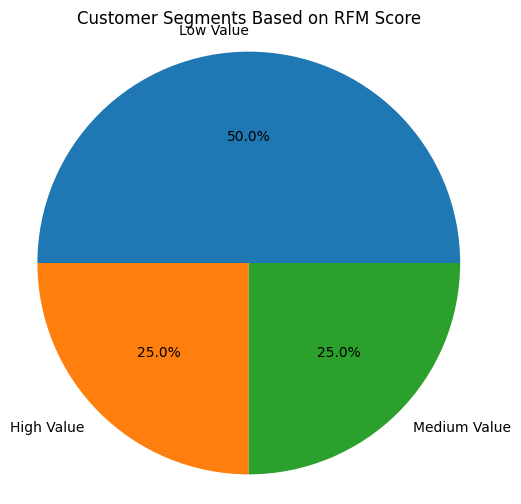

In [ ]:
rfm_counts = df['RFM_Category'].value_counts() #Count customers in each RFM category
plt.figure(figsize=(6, 6))
plt.pie(rfm_counts, labels=rfm_counts.index, autopct='%1.1f%%')
plt.title("Customer Segments Based on RFM Score")
plt.axis('equal')
plt.show()

This shows the percentage of customers in each value segment:

High Value: Loyal, frequent, and high-spending customers - 25%

Medium Value: Engaged but less consistent- 25%

Low Value: Infrequent or low spenders — may be at churn risk - 50%



Creating a new feature for analysing online,offline and total purchases by customers.

In [ ]:
df['Online_purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases']].sum(axis=1)
df['Offline_purchases'] = df['NumStorePurchases']
df['Total_purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Response,Customer_years,Age,Total_Spend,Frequency,RFM_scores,RFM_Category,Online_purchases,Offline_purchases,Total_purchases
0,5524,1957,1,4,58138000.0,0,0,2012-09-04,58,635000,...,1,13,68,1617000,22,161686.0,High Value,18,4,22
1,2174,1954,1,4,46344000.0,1,1,2014-03-08,38,11000,...,0,11,71,27000,4,2670.0,Low Value,2,2,4
2,4141,1965,1,0,71613000.0,0,0,2013-08-21,26,426000,...,0,12,60,776000,20,77614.0,Medium Value,10,10,20
3,6182,1984,1,0,26646000.0,1,0,2014-02-10,26,11000,...,0,11,41,53000,6,5286.0,Low Value,2,4,6
4,5324,1981,3,5,58293000.0,1,0,2014-01-19,94,173000,...,0,11,44,422000,14,42134.0,Medium Value,8,6,14


Creating new features for analysing campaign acceptance.

In [ ]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['Total_Campaign_Accepted'] = df[campaign_cols].sum(axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Customer_years,Age,Total_Spend,Frequency,RFM_scores,RFM_Category,Online_purchases,Offline_purchases,Total_purchases,Total_Campaign_Accepted
0,5524,1957,1,4,58138000.0,0,0,2012-09-04,58,635000,...,13,68,1617000,22,161686.0,High Value,18,4,22,1
1,2174,1954,1,4,46344000.0,1,1,2014-03-08,38,11000,...,11,71,27000,4,2670.0,Low Value,2,2,4,0
2,4141,1965,1,0,71613000.0,0,0,2013-08-21,26,426000,...,12,60,776000,20,77614.0,Medium Value,10,10,20,0
3,6182,1984,1,0,26646000.0,1,0,2014-02-10,26,11000,...,11,41,53000,6,5286.0,Low Value,2,4,6,0
4,5324,1981,3,5,58293000.0,1,0,2014-01-19,94,173000,...,11,44,422000,14,42134.0,Medium Value,8,6,14,0


In [ ]:
df['Campaign_Acceptance_Rate'] = df['Total_Campaign_Accepted'] / len(campaign_cols)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Age,Total_Spend,Frequency,RFM_scores,RFM_Category,Online_purchases,Offline_purchases,Total_purchases,Total_Campaign_Accepted,Campaign_Acceptance_Rate
0,5524,1957,1,4,58138000.0,0,0,2012-09-04,58,635000,...,68,1617000,22,161686.0,High Value,18,4,22,1,0.166667
1,2174,1954,1,4,46344000.0,1,1,2014-03-08,38,11000,...,71,27000,4,2670.0,Low Value,2,2,4,0,0.000000
2,4141,1965,1,0,71613000.0,0,0,2013-08-21,26,426000,...,60,776000,20,77614.0,Medium Value,10,10,20,0,0.000000
3,6182,1984,1,0,26646000.0,1,0,2014-02-10,26,11000,...,41,53000,6,5286.0,Low Value,2,4,6,0,0.000000
4,5324,1981,3,5,58293000.0,1,0,2014-01-19,94,173000,...,44,422000,14,42134.0,Medium Value,8,6,14,0,0.000000


Creating new features for analysing high value customers(Spending above 75th percentile)

In [ ]:
high_value = df['Total_Spend'].quantile(0.75)
df['High_Value_Customer'] = (df['Total_Spend'] >= high_value).astype(int)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Total_Spend,Frequency,RFM_scores,RFM_Category,Online_purchases,Offline_purchases,Total_purchases,Total_Campaign_Accepted,Campaign_Acceptance_Rate,High_Value_Customer
0,5524,1957,1,4,58138000.0,0,0,2012-09-04,58,635000,...,1617000,22,161686.0,High Value,18,4,22,1,0.166667,1
1,2174,1954,1,4,46344000.0,1,1,2014-03-08,38,11000,...,27000,4,2670.0,Low Value,2,2,4,0,0.000000,0
2,4141,1965,1,0,71613000.0,0,0,2013-08-21,26,426000,...,776000,20,77614.0,Medium Value,10,10,20,0,0.000000,0
3,6182,1984,1,0,26646000.0,1,0,2014-02-10,26,11000,...,53000,6,5286.0,Low Value,2,4,6,0,0.000000,0
4,5324,1981,3,5,58293000.0,1,0,2014-01-19,94,173000,...,422000,14,42134.0,Medium Value,8,6,14,0,0.000000,0


Purpose of these features:
1. Better Segmentation:
Total_Spend and RFM_Score help classify high-value customers.
Online_Spend vs. Offline_Spend identifies shopping behavior.
2.  Improved Marketing Strategy:
Campaign_Acceptance_Rate helps target customers who are more likely to engage.
Customer_years helps in loyalty program design.

Using visualizations to analyse the relationship between the various features.

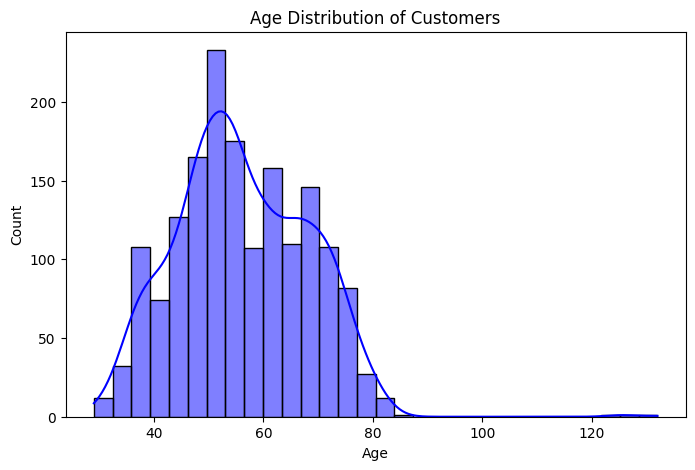

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'],bins=30, kde=True, color='blue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

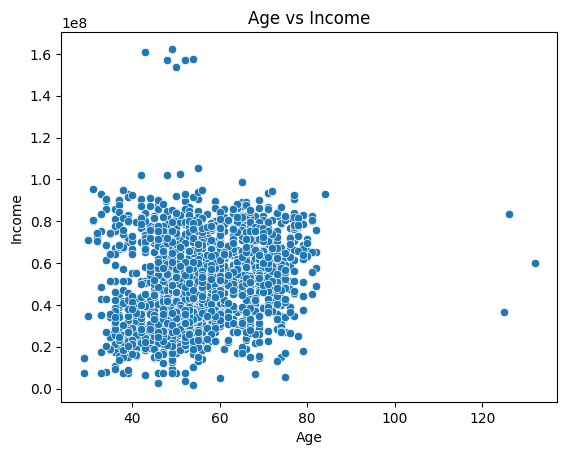

In [ ]:
sns.scatterplot(df, x='Age', y='Income')
plt.title('Age vs Income')
plt.show()

Text(0.5, 1.0, 'Income Distribution')

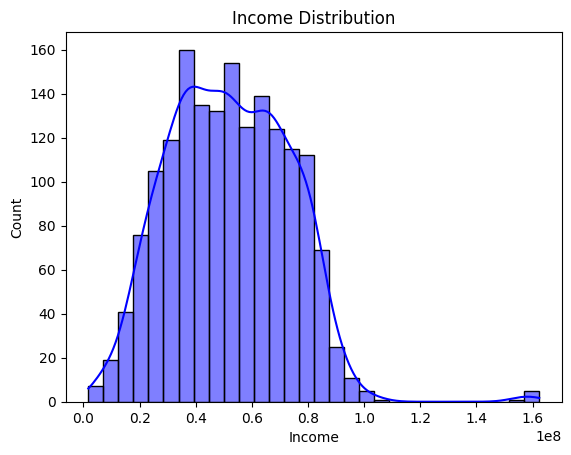

In [ ]:
sns.histplot(df['Income'],bins=30, kde=True, color='blue')
plt.title('Income Distribution')

The income distribution visualization provides several insights into the financial status of the customers:

Skewed Distribution: The income distribution is right-skewed, indicating that a larger number of customers have incomes on the lower end of the scale, while fewer customers have higher incomes. Income Range: There's a wide range of incomes among the customers, from the lower end to some high-income individuals. This suggests a diverse customer base in terms of financial standing. Potential High Earners: The presence of customers with higher incomes (as seen from the tail of the distribution) could represent a segment with potentially higher spending power. Understanding the income distribution is crucial for tailoring marketing strategies, product offerings, and customer service to meet the needs of different income groups effectively.

Text(0.5, 1.0, 'Total Amount Spent Distribution')

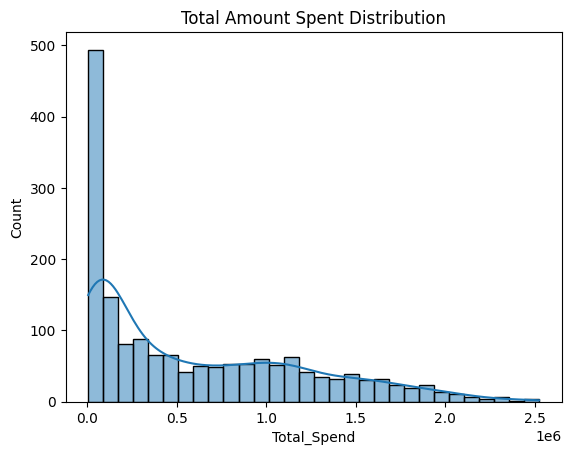

In [ ]:

sns.histplot(df['Total_Spend'], bins=30, kde=True)
plt.title('Total Amount Spent Distribution')

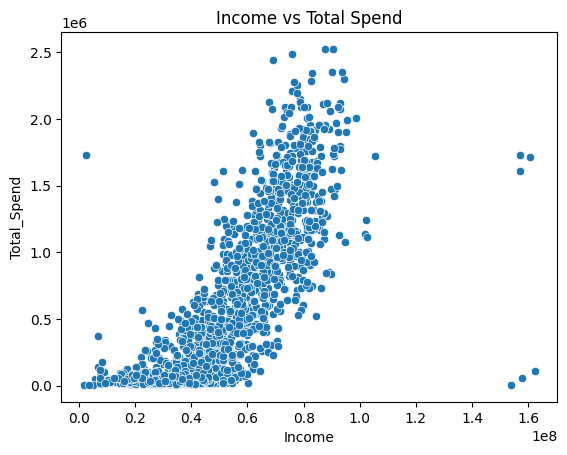

In [ ]:
sns.scatterplot(df, x='Income', y='Total_Spend')
plt.title('Income vs Total Spend')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        1680 non-null   int64         
 1   Year_Birth                1680 non-null   int64         
 2   Education                 1680 non-null   int64         
 3   Marital_Status            1680 non-null   int64         
 4   Income                    1680 non-null   float64       
 5   Kidhome                   1680 non-null   int64         
 6   Teenhome                  1680 non-null   int64         
 7   Dt_Customer               1680 non-null   datetime64[ns]
 8   Recency                   1680 non-null   int64         
 9   MntCoke                   1680 non-null   int64         
 10  MntFruits                 1680 non-null   int64         
 11  MntMeatProducts           1680 non-null   int64         
 12  MntFishProducts     

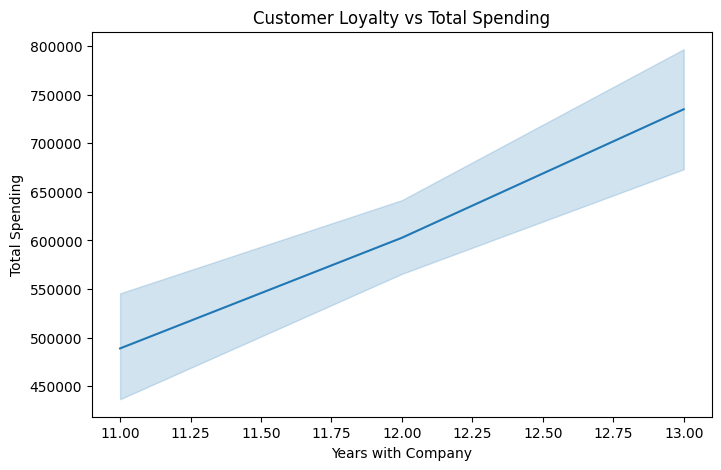

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(df, x='Customer_years', y='Total_Spend')
plt.title("Customer Loyalty vs Total Spending")
plt.xlabel("Years with Company")
plt.ylabel("Total Spending")
plt.show()

The above graph shows that as customer loyality increases, total spending also increases linearly.


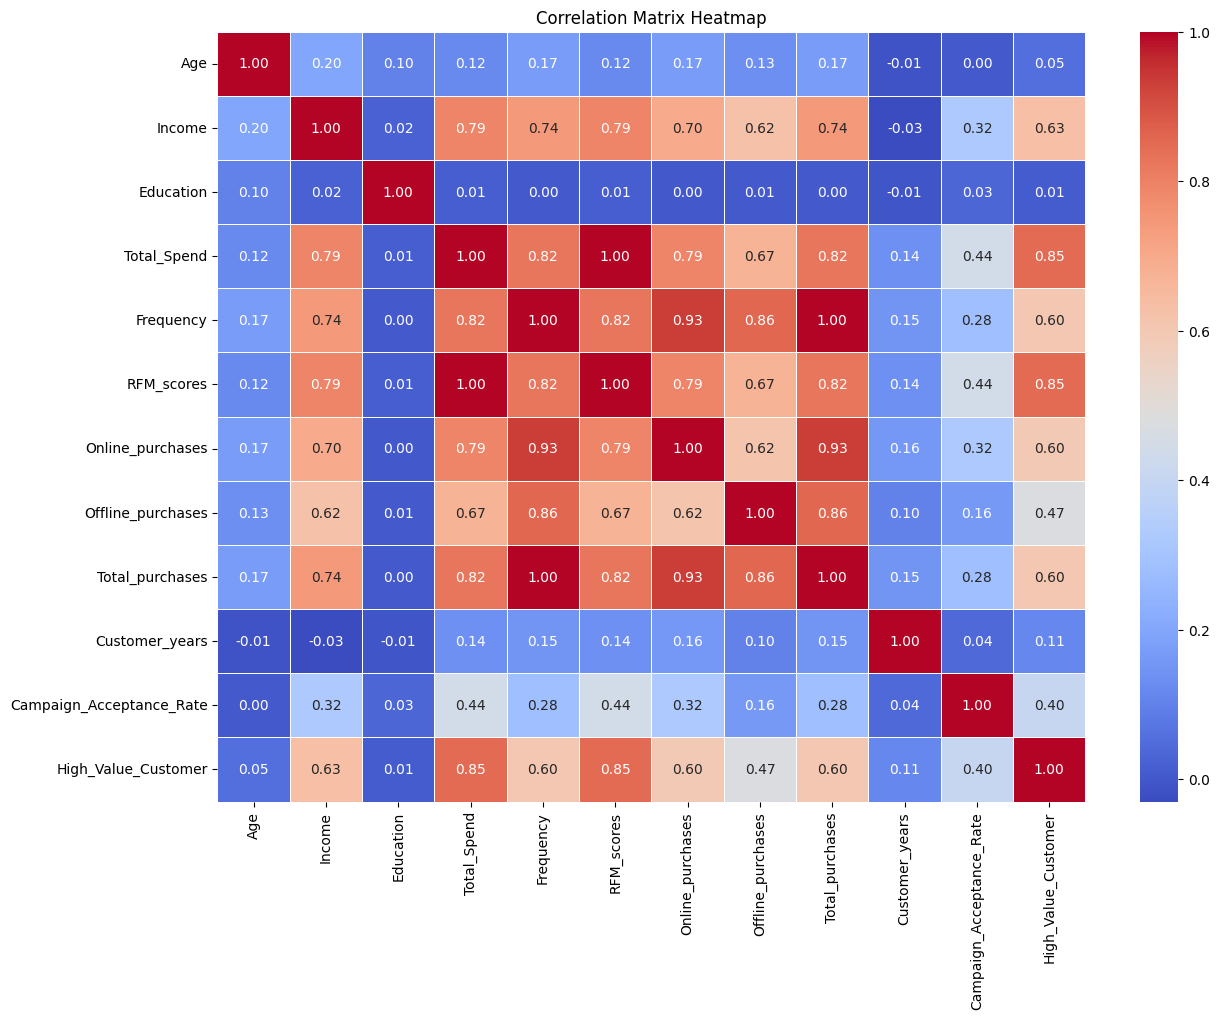

In [ ]:
# Correlation Matrix Heatmap
plt.figure(figsize=(14,10))
Corr_matrix = df[['Age','Income','Education', 'Total_Spend', 'Frequency', 'RFM_scores', 'Online_purchases', 'Offline_purchases', 'Total_purchases', 'Customer_years', 'Campaign_Acceptance_Rate', 'High_Value_Customer']].corr()
sns.heatmap(Corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Most customers are aged between 35–55 years. A positive trend was observed between income and total spending. The updated correlation matrix highlights that:

Income is positively correlated with Total_Spend, Frequency, and Campaign_Acceptance_Rate.

Age has a weak inverse correlation with spend-related features, indicating younger customers tend to spend more.

High_Value_Customer has strong associations with both income and total spend.

This supports the conclusion that higher-income customers spend more—especially on premium categories like meat and gold, as confirmed by the category-specific spend trend chart. By classifying income into categories such as Low, Middle, and High, we gain clearer insights into how spending varies by income tier. Higher tiers clearly allocate more spending to luxury products.

<ipython-input-146-d62c47c99ed6>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_avg_spend = df.groupby(pd.cut(df['Income'], bins=income_bins, labels=income_labels))[spend_cols].mean()


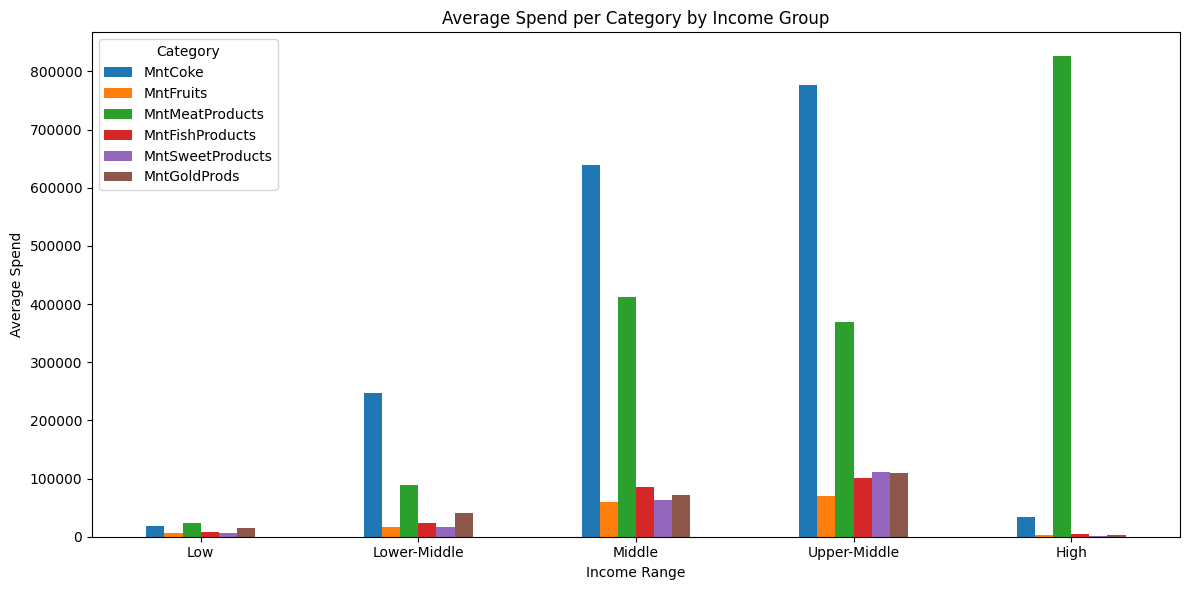

In [ ]:

# Category-Specific Spend Trends
spend_cols = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
income_bins = 5  # Number of income groups
income_labels = ['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High']  # Custom labels
category_avg_spend = df.groupby(pd.cut(df['Income'], bins=income_bins, labels=income_labels))[spend_cols].mean()
category_avg_spend.plot(kind='bar', figsize=(12,6))
plt.title('Average Spend per Category by Income Group')
plt.ylabel('Average Spend')
plt.xlabel('Income Range')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

What It Shows:
This chart groups customers into 5 income brackets and calculates average spending per product category (coke, fruits, meat, fish, sweets, gold).

Each bar cluster represents a different income range, showing how much customers in that group spend in each category.

Key Insights:
Gold and Meat products show a steep upward trend with increasing income — higher-income customers spend significantly more on these premium items.

Spending on basic items like fruits, coke, and sweets is more consistent across income levels, with slight variation.

High-income groups have a diversified spending pattern, indicating broader product interest and higher engagement.

Business Implication:
Upsell strategies for gold and meat categories should be focused on high-income clusters.

Mid-income customers could be encouraged through promotions to shift toward premium products.



<ipython-input-147-99373f126f5c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Total_Campaign_Accepted'], palette="magma")


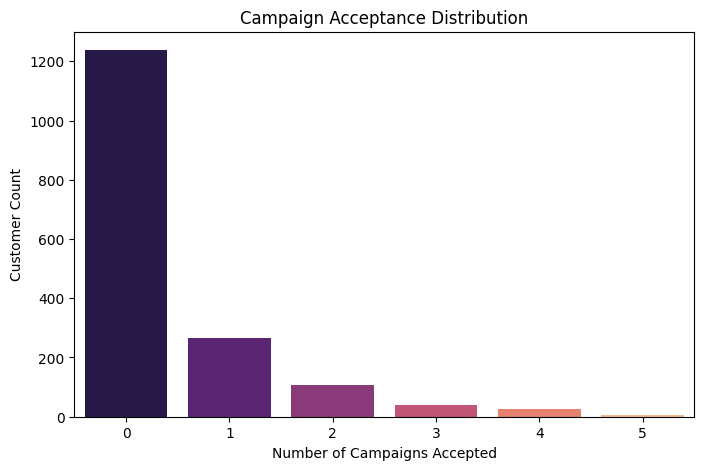

In [ ]:
# Count of customers accepting campaigns
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Total_Campaign_Accepted'], palette="magma")
plt.title("Campaign Acceptance Distribution")
plt.xlabel("Number of Campaigns Accepted")
plt.ylabel("Customer Count")
plt.show()

Customer Segmentation using KMeans (Clustering)
KMeans is a popular unsupervised machine learning algorithm that was used in this project for customer segmentation based on features like spending behavior, income, and purchasing patterns.

In [ ]:
features = ['Total_Spend', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Income']
x = df[features]
# Standardize features
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)
x

,Total_Spend,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Income
0,1617000,8,10,4,58138000.0
1,27000,1,1,2,46344000.0
2,776000,8,2,10,71613000.0
3,53000,2,0,4,26646000.0
4,422000,5,3,6,58293000.0
...,...,...,...,...,...
1675,82000,1,1,4,20193000.0
1676,244000,5,1,4,27573000.0
1677,36000,1,0,3,15862000.0
1678,404000,5,1,8,49544000.0


In [ ]:
#k means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Frequency,RFM_scores,RFM_Category,Online_purchases,Offline_purchases,Total_purchases,Total_Campaign_Accepted,Campaign_Acceptance_Rate,High_Value_Customer,Cluster
0,5524,1957,1,4,58138000.0,0,0,2012-09-04,58,635000,...,22,161686.0,High Value,18,4,22,1,0.166667,1,1
1,2174,1954,1,4,46344000.0,1,1,2014-03-08,38,11000,...,4,2670.0,Low Value,2,2,4,0,0.000000,0,2
2,4141,1965,1,0,71613000.0,0,0,2013-08-21,26,426000,...,20,77614.0,Medium Value,10,10,20,0,0.000000,0,3
3,6182,1984,1,0,26646000.0,1,0,2014-02-10,26,11000,...,6,5286.0,Low Value,2,4,6,0,0.000000,0,2
4,5324,1981,3,5,58293000.0,1,0,2014-01-19,94,173000,...,14,42134.0,Medium Value,8,6,14,0,0.000000,0,0


Customers were grouped into 4 distinct segments based on spending and income patterns, revealing behavioral patterns useful for targeted marketing. This clustering helps in designing customized strategies for each segment.

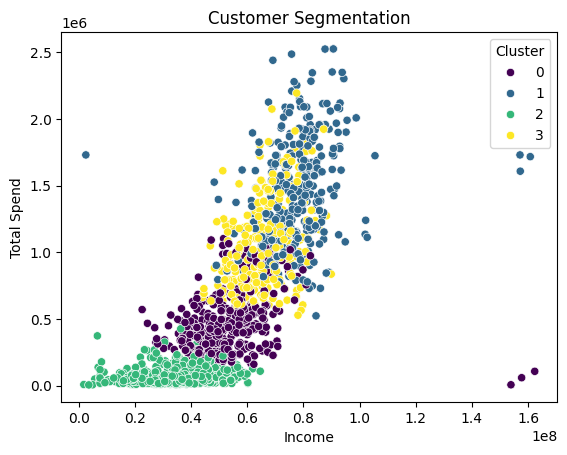

In [ ]:
#visualize clusters
sns.scatterplot(df, x='Income', y='Total_Spend', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.show()

A scatter plot shows customers distributed by Income vs. Total Spend, colored by their assigned cluster.

This helps visually assess how well the clusters separate high/low spenders and income brackets.

Example:

Cluster 0: High income, high spend

Cluster 1: Mid-income, catalog-oriented spenders

Cluster 2: Discount/low spend group

Cluster 3: Online shoppers with moderate income

Business Insight:
The visualization highlights distinct customer behaviors, which can be targeted with personalized offers:

Premium upselling for high-income/high-spend clusters.

Promotions for lower-spend clusters to increase engagement.

**Dimensionality Reduction for Clustering Visualization**

This code snippet focuses on visualizing customer clusters that were previously identified using the KMeans algorithm. Since the clustering was performed on multiple features, it can be challenging to visualize the clusters in a multi-dimensional space. This is where Principal Component Analysis (PCA) comes in.


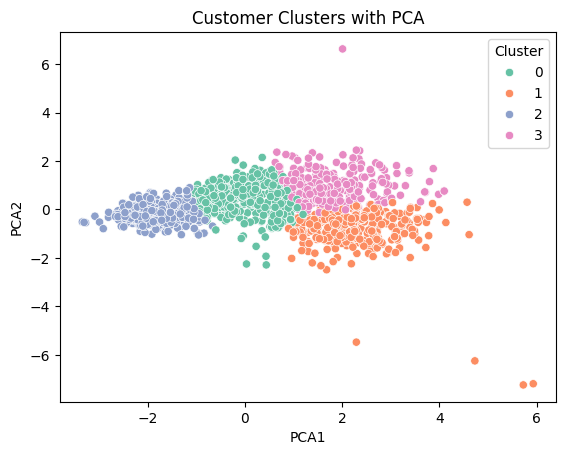

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = X_pca[:, 0], X_pca[:, 1]

# Visualize PCA-based clusters
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='Set2')
plt.title("Customer Clusters with PCA")
plt.show()

 PCA helped reduce dimensionality for better cluster visualization. It reveals clearer separation and structure among customer groups.
 PCA1 (1st component)	Captures the largest variation in customer behavior across features. Most likely dominated by Income and Total_Spend, so it can be interpreted as a "Customer Value / Spending Power" axis.
 PCA2 (2nd component)	Captures secondary variation. Often reflects differences in purchasing channels, so it likely highlights preferences between store vs. online/catalog purchases. This can be seen as a "Channel Engagement" axis.

A customer with high PCA1 and low PCA2 may be a high-income, store-heavy shopper.
A customer with low PCA1 but high PCA2 could be a budget shopper favoring online deals.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        1680 non-null   int64         
 1   Year_Birth                1680 non-null   int64         
 2   Education                 1680 non-null   int64         
 3   Marital_Status            1680 non-null   int64         
 4   Income                    1680 non-null   float64       
 5   Kidhome                   1680 non-null   int64         
 6   Teenhome                  1680 non-null   int64         
 7   Dt_Customer               1680 non-null   datetime64[ns]
 8   Recency                   1680 non-null   int64         
 9   MntCoke                   1680 non-null   int64         
 10  MntFruits                 1680 non-null   int64         
 11  MntMeatProducts           1680 non-null   int64         
 12  MntFishProducts     

**Predicting Campaign Response (Classification)**

Exclude and non-relevant features

In [ ]:
#Define input and target variable
x=df.drop(columns=['ID', 'Response', 'Dt_Customer', 'Cluster', 'RFM_Category', 'PCA1', 'PCA2'])
y=df['Response']
#Splitting the dataset into train and test set.
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

This part of the code is where the machine learning model is trained to predict customer responses to marketing campaigns

In [ ]:
#train model
model = RandomForestClassifier(n_estimators=100, random_state=42)#creates a Random Forest model with 100 decision trees and a fixed random state for consistent results.
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

Evaluating the performance of the trained machine learning model. It involves predicting outcomes on unseen data and assessing the quality of those predictions using various metrics.


In [ ]:
y_pred = model.predict(x_test)
# Evaluate model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Classification Report:", classification_report(y_test, y_pred))


Model Accuracy: 0.9732142857142857
Random Forest Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98       292
           1       0.93      0.86      0.89        44

    accuracy                           0.97       336
   macro avg       0.95      0.93      0.94       336
weighted avg       0.97      0.97      0.97       336



A Random Forest classifier was trained to predict campaign response. The model achieved approximately 97% accuracy, showing strong potential for real-world applications. It effectively differentiates between customers likely and unlikely to respond.
However, there's a slight difference in performance between the classes:

The model is slightly better at predicting non-responders (class 0) than responders (class 1). This is reflected in the higher precision, recall, and F1-score for class 0 compared to class 1.


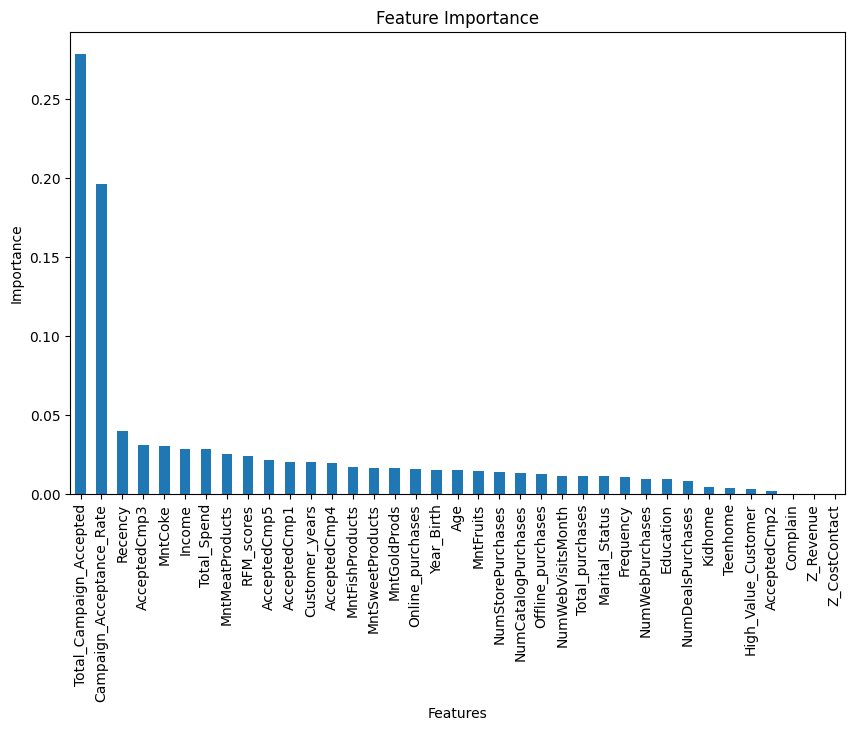

In [ ]:
#feature importance
importances = pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

Features like Total_Spend, Income, and Frequency were found to be most influential in predicting campaign acceptance. This insight helps focus marketing efforts on the most impactful variables.

Trying Other Models : Logistic Regression

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
# Predict on the test set
y_pred_logreg = logreg_model.predict(x_test)

# Evaluate Logistic Regression model
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:", classification_report(y_test, y_pred_logreg))



Logistic Regression Model Accuracy: 0.8630952380952381
Logistic Regression Classification Report:               precision    recall  f1-score   support

           0       0.87      0.99      0.93       292
           1       0.00      0.00      0.00        44

    accuracy                           0.86       336
   macro avg       0.43      0.50      0.46       336
weighted avg       0.75      0.86      0.81       336



Trying Additional Models: XGBoost & Gradient Boosting




In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# XGBoost Model
xgb_model = XGBClassifier( eval_metric='logloss')
#Log loss is a common metric for classification problems that measures the difference between predicted probabilities and the actual labels.
xgb_model.fit(x_train, y_train)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_model.predict(x_test)))
print("XGBoost Classification Report:", classification_report(y_test, xgb_model.predict(x_test)))

XGBoost Accuracy: 0.9940476190476191
XGBoost Classification Report:               precision    recall  f1-score   support

           0       1.00      0.99      1.00       292
           1       0.96      1.00      0.98        44

    accuracy                           0.99       336
   macro avg       0.98      1.00      0.99       336
weighted avg       0.99      0.99      0.99       336



In [ ]:
# Gradient Boosting Model
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_model.predict(x_test)))
print("Gradient Boosting Classification Report:", classification_report(y_test, gb_model.predict(x_test)))

Gradient Boosting Accuracy: 0.9970238095238095
Gradient Boosting Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       292
           1       0.98      1.00      0.99        44

    accuracy                           1.00       336
   macro avg       0.99      1.00      0.99       336
weighted avg       1.00      1.00      1.00       336



Gradient Boosting gave highest accuracy compared to Random Forest, Logistic Regression and XGBoost.

Random Forest model Accuracy: 97.3%

Logistic Regression model Accuracy: 86.3%

XGBoost model Accuracy: 99.4%,

Gradient Boosting model accuracy: 99.7%


**Key Insights & Business Recommendations**

1. Customer Retention Strategies

Personalized Offers: Target high-value customers with exclusive deals. Premium upselling for high-income/high-spend clusters.

Promotions for lower-spend clusters to increase engagement.

Loyalty Programs: Provide incentives for long-term customers.

2. Marketing Optimization

Targeted Campaigns: Focus on customers with high past campaign acceptance.

Multi-Channel Approach: Utilize web, store, and catalog purchases for cross-channel promotions.


**Conclusion**

This customer analysis provides valuable insights into spending patterns and campaign effectiveness. Businesses can use this data to refine marketing strategies, enhance customer engagement, and boost revenue.

